In [1]:
%reload_ext autoreload
%autoreload 2

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import cfspopcon
from cfspopcon.unit_handling import ureg

# Change to the top-level directory. Required to find radas_dir in its default location.
%cd {Path(cfspopcon.__file__).parents[1]}
# As a sanity check, print out the current working directory
print(f"Running in {Path('').absolute()}")

/Users/oaknelson/Documents/GitHub/cfs-energy-internal/cfspopcon
Running in /Users/oaknelson/Documents/GitHub/cfs-energy-internal/cfspopcon


In [2]:
input_parameters, algorithm, points, plots  = cfspopcon.read_case("example_cases/NSF")
algorithm.validate_inputs(input_parameters)
dataset = xr.Dataset(input_parameters)

In [3]:
dataset = algorithm.update_dataset(dataset)

dataset # I like to print it to see the variables

<xarray.Dataset> Size: 2MB
Dimensions:                                (dim_average_electron_temp: 30,
                                            dim_average_electron_density: 20,
                                            dim_species: 2, dim_rho: 50)
Coordinates:
  * dim_average_electron_temp              (dim_average_electron_temp) float64 240B ...
  * dim_average_electron_density           (dim_average_electron_density) float64 160B ...
  * dim_species                            (dim_species) object 16B AtomicSpe...
Dimensions without coordinates: dim_rho
Data variables: (12/148)
    current_relaxation_time                (dim_average_electron_temp, dim_average_electron_density) float64 5kB [s] ...
    peak_pressure                          (dim_average_electron_temp, dim_average_electron_density) float64 5kB [Pa] ...
    fusion_triple_product                  (dim_average_electron_density, dim_average_electron_temp) float64 5kB [1e10 m^-3·keV·s] ...
    rho_star                               (dim_average_electron_temp) float64 240B [] ...
    nu_star                                (dim_average_electron_density, dim_average_electron_temp) float64 5kB [] ...
    core_radiated_power_fraction           (dim_average_electron_density, dim_average_electron_temp) float64 5kB [] ...
    ...                                     ...
    total_flux_available_from_CS           int64 8B [Wb] 35
    ejima_coefficient                      float64 8B [] 0.6
    safety_factor_on_axis                  int64 8B [] 1
    vertical_magnetic_field_equation       <U4 16B 'Barr'
    average_electron_density               (dim_average_electron_density) float64 160B [1e19 m^-3] ...
    average_electron_temp                  (dim_average_electron_temp) float64 240B [keV] ...

# Plotting and interrogating the results

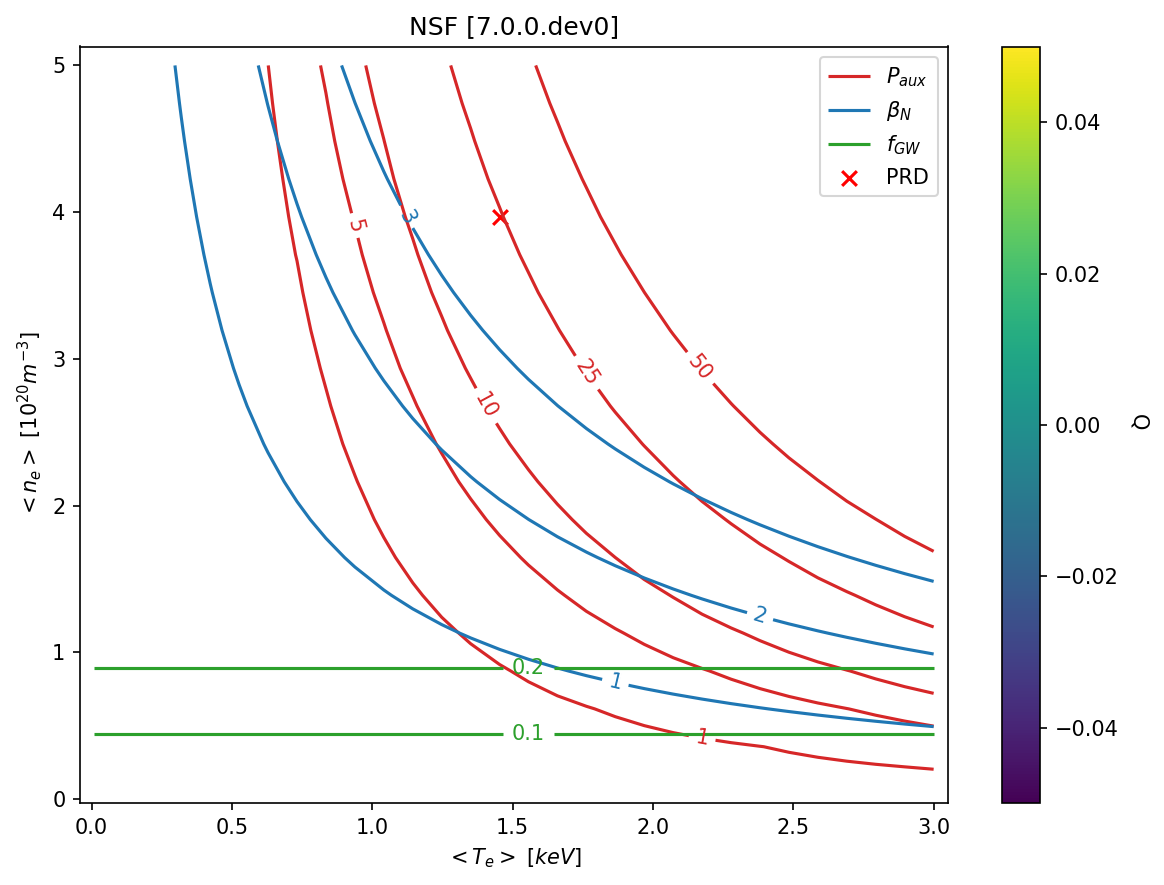

In [4]:
# default plot, using yaml

plot_style = cfspopcon.read_plot_style("example_cases/NSF/plot_popcon.yaml")
cfspopcon.plotting.make_plot(
    dataset,
    plot_style,
    points=points,
    title="NSF",
    save_name=None
)

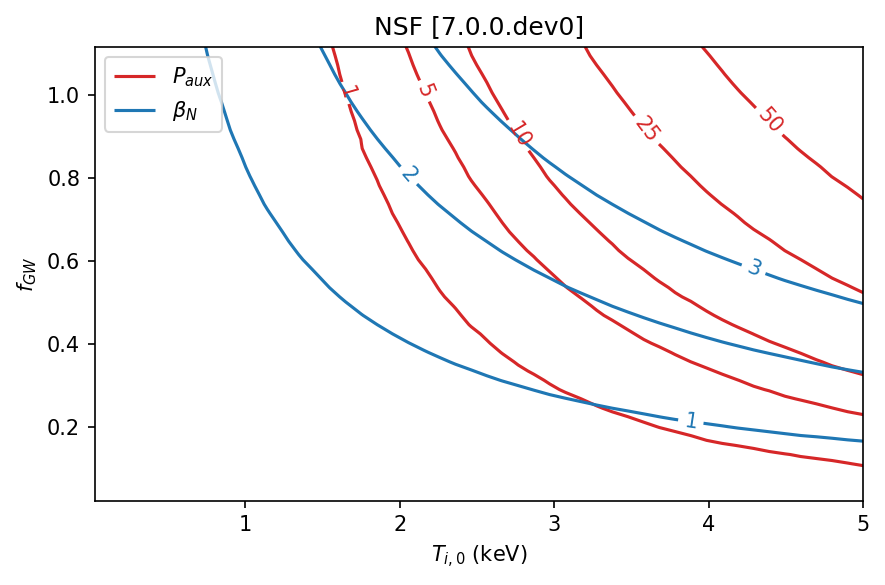

In [5]:
## REMAPPED PLOT, using yaml

cfspopcon.plotting.make_plot(dataset,
                             cfspopcon.read_plot_style("example_cases/NSF/plot_remapped.yaml"),
                             points={},
                             title="NSF",
                             save_name=None,
                            )

[[1.00000000e-03 1.00000000e-03 1.00000000e-03 1.00000000e-03
  1.00000000e-03 1.00000000e-03 1.00000000e-03 1.00000000e-03
  1.00000000e-03 1.00000000e-03 1.00000000e-03 1.00000000e-03
  1.00000000e-03 1.00000000e-03 1.00000000e-03 1.00000000e-03
  1.00000000e-03 1.00000000e-03 1.00000000e-03 1.00000000e-03
  1.00000000e-03 1.00000000e-03 1.00000000e-03 1.00000000e-03
  1.00000000e-03 1.00000000e-03 1.00000000e-03 1.00000000e-03
  1.00000000e-03 3.11463407e-02]
 [1.00000000e-03 1.00000000e-03 1.00000000e-03 1.00000000e-03
  1.00000000e-03 1.00000000e-03 1.00000000e-03 1.00000000e-03
  1.00000000e-03 1.00000000e-03 1.00000000e-03 1.00000000e-03
  1.00000000e-03 1.00000000e-03 1.00000000e-03 1.00000000e-03
  1.00000000e-03 4.31800547e-02 1.74374679e-01 3.13100634e-01
  4.61028749e-01 6.19664866e-01 7.90392599e-01 9.74504095e-01
  1.17322253e+00 1.38771876e+00 1.61912382e+00 1.86853840e+00
  2.13704010e+00 2.42568904e+00]
 [1.00000000e-03 1.00000000e-03 1.00000000e-03 1.00000000e-03
  1.

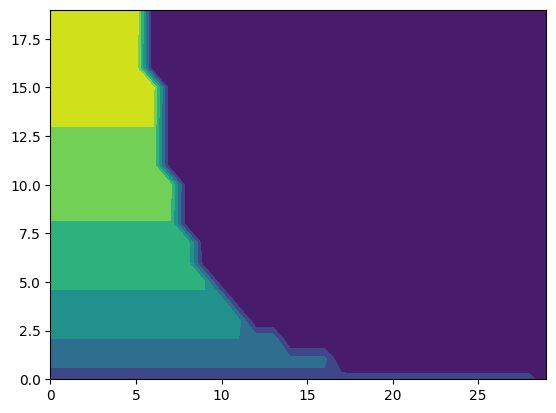

In [6]:
# # generate a missing data (here eg h98)

# scalings = 'cfspopcon/formulas/energy_confinement/energy_confinement_scalings.yaml'

# import yaml

# with open(scalings) as stream:
#     allscalings = yaml.safe_load(stream)
# pars = allscalings['ITER98y2']['params']

# import numpy as np

# paux = dataset['P_auxillary_launched'].data.magnitude
# paux[np.where(paux==0)] = 0.001
# print(paux)

# H98 = (pars['constant']
#     * dataset['average_ion_mass'].data.magnitude ** pars['mass_ratio_alpha']
#     * dataset['magnetic_field_on_axis'].data.magnitude ** pars['field_on_axis_alpha']
#     * (dataset['plasma_current']/1e6).data.magnitude ** pars['plasma_current_alpha']
#     * paux ** pars['input_power_alpha']
#     * dataset['major_radius'].data.magnitude ** pars['major_radius_alpha']
#     * dataset['inverse_aspect_ratio'].data.magnitude ** pars['inverse_aspect_ratio_alpha']
#     * dataset['areal_elongation'].data.magnitude ** pars['areal_elongation_alpha']
#     * dataset['separatrix_elongation'].data.magnitude ** pars['separatrix_elongation_alpha']
#     * np.broadcast_to(dataset['average_electron_density'].data.magnitude ** pars['average_density_alpha'], (30,20)).transpose()
#     * dataset['q_star'].data.magnitude ** pars['qstar_alpha'])

# plt.contourf(H98)


Text(0.5, 1.0, 'NSF')

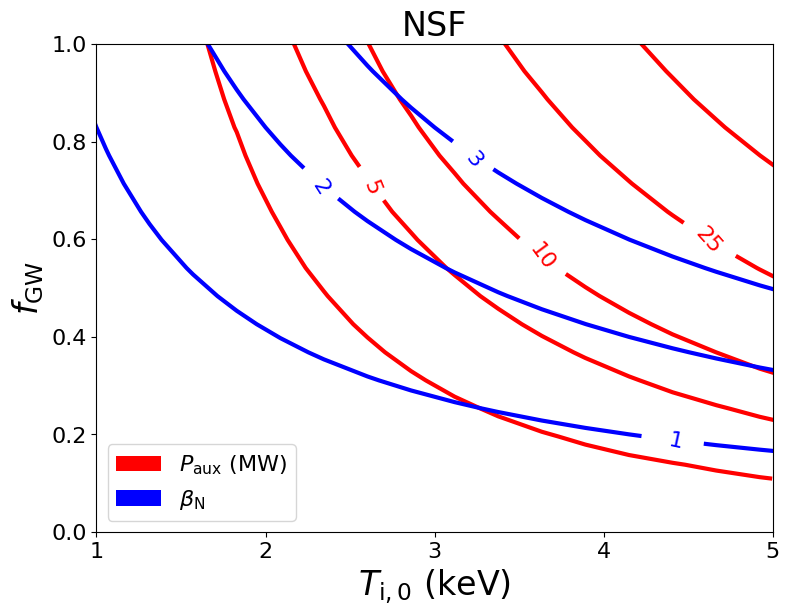

In [8]:
# say you want to make your own plot

import matplotlib.patches as patches

x = dataset['peak_ion_temp'].data
y = dataset['greenwald_fraction'].data
paux = dataset['P_auxillary_launched'].data
betan = dataset['normalized_beta'].data

lw = 3
fontsize = 24
labelsize = fontsize-8

plt.figure(figsize=(8,6))
ax = plt.subplot(111)

CS = ax.contour(x, y, paux, colors='r', levels=[1, 5, 10, 25, 50], linewidths=lw)
ax.clabel(CS, CS.levels, inline=True, fmt='%2.0f', fontsize=labelsize)
rect = patches.Rectangle((0,0),0,0,fc = 'r',label = r'$P_\mathrm{aux}$ (MW)')
ax.add_patch(rect)

CS = ax.contour(x, y, betan, colors='b', levels=[1, 2, 3], linewidths=lw)
ax.clabel(CS, CS.levels, inline=True, fmt='%2.0f', fontsize=labelsize)
rect = patches.Rectangle((0,0),0,0,fc = 'b',label = r'$\beta_\mathrm{N}$')
ax.add_patch(rect)

ax.set_xlabel(r'$\it{T}_\mathrm{i,0}$ (keV)', fontsize=fontsize)
ax.set_ylabel(r'$\it{f}_\mathrm{GW}$', fontsize=fontsize)
ax.tick_params(labelsize=labelsize)
ax.set_xticks([1,2,3,4,5])
ax.set_xlim(1,5)
ax.set_ylim(0,1)

plt.tight_layout()

ax.legend(bbox_to_anchor=(0,0), loc='lower left',fontsize=labelsize)
ax.set_title('NSF', fontsize=fontsize)
